In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow

import cv2
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,AveragePooling2D,Flatten,MaxPooling2D,BatchNormalization,Dropout

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [2]:
train_gen = ImageDataGenerator(featurewise_center = True,
                                  featurewise_std_normalization = True,
                                  samplewise_center = False,
                                  rotation_range = 45,width_shift_range=0.4 ,
                                  height_shift_range = 0.4,brightness_range=[-0.2,1.2],shear_range=4,rescale=1./255
                                  )
test_gen = ImageDataGenerator(rescale=1./255)

In [3]:
final_train_gen = train_gen.flow_from_directory(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train",
                              target_size=(227,227),class_mode='sparse',batch_size=90)

final_test_gen = test_gen.flow_from_directory(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid",
                              target_size=(227,227),class_mode='sparse',batch_size=90)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [4]:
final_train_gen.class_indices

{'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts':

#### VGG19 and VGG16

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32


# Load pre-trained models
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model_vgg16.layers:
    layer.trainable = False


# Create model architecture
model_vgg16 = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(53, activation='softmax')
])


# Compile the models
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train",
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid",
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [6]:
# Train the models
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the models
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)



Epoch 1/10
238/238 [==============================] - 2644s 11s/step - loss: 3.5232 - accuracy: 0.1201 - val_loss: 2.0734 - val_accuracy: 0.4766
Epoch 2/10
238/238 [==============================] - 1659s 7s/step - loss: 2.6234 - accuracy: 0.2471 - val_loss: 1.5084 - val_accuracy: 0.5859
Epoch 3/10
238/238 [==============================] - 1580s 7s/step - loss: 2.3668 - accuracy: 0.2985 - val_loss: 1.3562 - val_accuracy: 0.6602
Epoch 4/10
238/238 [==============================] - 1740s 7s/step - loss: 2.2366 - accuracy: 0.3305 - val_loss: 1.2187 - val_accuracy: 0.6680
Epoch 5/10
238/238 [==============================] - 2923s 12s/step - loss: 2.1177 - accuracy: 0.3606 - val_loss: 1.0526 - val_accuracy: 0.7461
Epoch 6/10
238/238 [==============================] - 1563s 7s/step - loss: 2.0670 - accuracy: 0.3717 - val_loss: 0.9863 - val_accuracy: 0.7227
Epoch 7/10
238/238 [==============================] - 1553s 7s/step - loss: 1.9991 - accuracy: 0.3838 - val_loss: 0.9045 - val_accurac

history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

### Model Evaluation and Testing

In [19]:
result = train_generator.class_indices
result

{'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts':

In [8]:
import os
test_ = []
for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test"):
    test_.append(folder)
    
import os
train_ = []
for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train"):
    train_.append(folder)

for j in train_:
    if j not in test_:
        print(j)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Load pre-trained model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Create model architecture
model_vgg16 = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Added more dense layers
    Dropout(0.3),                    # Added dropout for regularization
    Dense(128, activation='relu'),   # Added more dense layers
    Dense(53, activation='softmax')
])

# Compile the model with a lower learning rate
opt = Adam(lr=0.0001)
model_vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing with more aggressive augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data generators
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model with more epochs
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,  # Increased epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
238/238 [==============================] - 1590s 7s/step - loss: 3.8233 - accuracy: 0.0594 - val_loss: 3.2784 - val_accuracy: 0.2461
Epoch 2/20
238/238 [==============================] - 2877s 12s/step - loss: 3.2226 - accuracy: 0.1589 - val_loss: 2.3790 - val_accuracy: 0.4297
Epoch 3/20
238/238 [==============================] - 3036s 13s/step - loss: 2.7113 - accuracy: 0.2565 - val_loss: 1.7782 - val_accuracy: 0.5156
Epoch 4/20
238/238 [==============================] - 1725s 7s/step - loss: 2.3331 - accuracy: 0.3356 - val_loss: 1.4421 - val_accuracy: 0.6289
Epoch 5/20
238/238 [==============================] - 1543s 6s/step - loss: 2.0691 - accuracy: 0.4037 - val_loss: 1.2465 - val_accuracy: 0.6836
Epoch 6/20
238/238 [==============================] - 1540s 6s/step - loss: 1.8684 - accuracy: 0.4568 - val_loss: 1.0655 - val_accuracy: 0.7188
Epoch 7/20
238/238 [=============================

In [22]:
vgg16_scores = model_vgg16.evaluate(test_generator)
print("VGG16 Test Loss:", vgg16_scores[0])
print("VGG16 Test accuracy:", vgg16_scores[1])



9/9 [==============================] - 90s 10s/step - loss: 0.6738 - accuracy: 0.8244
VGG16 Test Loss: 0.6738117933273315
VGG16 Test accuracy: 0.8244274854660034


In [23]:
vgg16_scores = model_vgg16.evaluate(validation_generator)

9/9 [==============================] - 91s 10s/step - loss: 0.4380 - accuracy: 0.8717


In [24]:
print("VGG16 validation Loss:", vgg16_scores[0])
print("VGG16 validation Accuracy:", vgg16_scores[1])

VGG16 validation Loss: 0.4380284547805786
VGG16 validation Accuracy: 0.8716981410980225


In [25]:
model_vgg16.save('cards_vgg16.h5')

In [12]:
--

SyntaxError: invalid syntax (<ipython-input-12-4071a1fba099>, line 1)

In [30]:
final_model = tensorflow.keras.models.load_model("cards_vgg16.h5")

In [28]:
path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\five of clubs\4.jpg"

img = cv2.imread(path)

output = np.argmax(final_model.predict(cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)[np.newaxis]))

value = {i for i in result if result[i]==output}
print("output is :",value)

output is : {'five of clubs'}


output is : {'ten of clubs'}


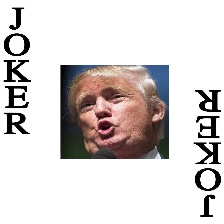

In [29]:
import tensorflow

from IPython.display import Image

path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\joker\3.jpg"

img = cv2.imread(path)

output = np.argmax(final_model.predict(cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)[np.newaxis]))

value = {i for i in result if result[i]==output}
print("output is :",value)

Image(filename=path)